In [2]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
plt.rcParams['image.cmap'] = 'gist_earth'
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util, image_util
from PIL import Image
from tensorflow.python.client import device_lib
print (device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 16632769265938426868
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 6504031847
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7861049312513432198
physical_device_desc: "device: 0, name: GeForce GTX 1080, pci bus id: 0000:02:00.0, compute capability: 6.1"
]


## Todo

Check that segmentation mask files are allways loading correctly i.e np.sum(..) should be zero if there is no mask. 

code the data_provider so that the first index in the label data is for the background and the second index the mask.

Downsample data

In [3]:
data_provider = image_util.NoduleDataProvider('tifdata/*.tif', n_class=2)

In [3]:
net = unet.Unet(layers=3, features_root=16, channels=1, n_class=2, gpu_ratio=0.6)


n_points = 4
data, label = data_provider(n_points)




2018-05-04 17:12:00,127 Layers 3, features 16, filter size 3x3, pool size: 2x2


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



2018-05-04 17:12:01,148 From /home/msekni/day2/stage1/tf_unet/unet.py:230: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



Instructions for updating:
keep_dims is deprecated, use keepdims instead


2018-05-04 17:12:01,680 From /home/msekni/day2/stage1/tf_unet/layers.py:63: calling reduce_sum (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


no masking
no masking


In [18]:
np.sum(label[0,:,:,1])

0.0

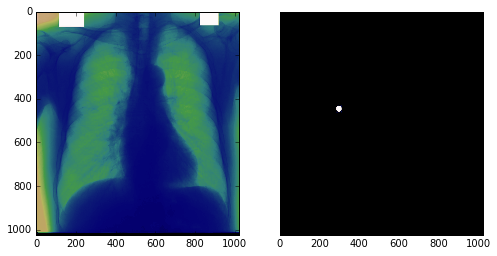

In [23]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(data[0,...,0], aspect="auto")
ax[1].imshow(label[0,:,:,1], aspect="auto")

In [4]:
trainer = unet.Trainer(net, batch_size=4, gpu_ratio=0.6)

In [ ]:
path = trainer.train(data_provider, 'output_data', training_iters=32, epochs=10)

2018-05-04 17:12:09,301 Removing '/home/msekni/day2/stage1/prediction'
2018-05-04 17:12:09,304 Removing '/home/msekni/day2/stage1/output_data'
2018-05-04 17:12:09,307 Allocating '/home/msekni/day2/stage1/prediction'
2018-05-04 17:12:09,309 Allocating '/home/msekni/day2/stage1/output_data'


no masking


In [25]:
ko = np.zeros((3,3), dtype=np.float32)

In [26]:
ko

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [42]:
d = np.array(ko, np.bool)

a = ~d
ko[...,2] = a[:,1]

ko

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [18]:
nx = 572
ny = 572

In [3]:
generator = image_gen.GrayScaleDataProvider(nx, ny, cnt=20)
x_test, y_test = generator(10)

(572, 572, 3) (572, 572, 1)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(572, 572, 3) (572, 572, 1)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(572, 572, 3) (572, 572, 1)
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(572, 572, 3) (572, 572, 1)
[[False False False ... False False False]
 [False False False ... False False False]
 [False Fa

In [4]:




col = 1

label1 = y_test[0,:,:,col]
label2 = y_test[0,:,:,1-col]

label2_fake = 1- label1
label1_fake = 1- label2



y_test.shape

(10, 572, 572, 2)

In [32]:
(np.sum(label1))/(572*572)

0.14951831385397818

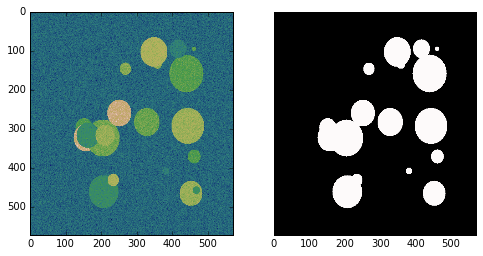

In [33]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(label1, aspect="auto")

In [12]:
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=16)

2018-05-03 19:01:26,870 Layers 3, features 16, filter size 3x3, pool size: 2x2


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



2018-05-03 19:01:27,966 From /Users/mmsek/thesis/xray/testcnn/tf_unet/unet.py:229: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



Instructions for updating:
keep_dims is deprecated, use keepdims instead


2018-05-03 19:01:28,392 From /Users/mmsek/thesis/xray/testcnn/tf_unet/layers.py:63: calling reduce_sum (from tensorflow.python.ops.math_ops) with keep_dims is deprecated and will be removed in a future version.
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [14]:
trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [15]:
path = trainer.train(generator, "./unet_trained", training_iters=20, epochs=10, display_step=2)

2018-05-03 19:02:24,486 Removing '/Users/mmsek/thesis/xray/testcnn/prediction'
2018-05-03 19:02:24,496 Removing '/Users/mmsek/thesis/xray/testcnn/unet_trained'
2018-05-03 19:02:24,498 Allocating '/Users/mmsek/thesis/xray/testcnn/prediction'
2018-05-03 19:02:24,500 Allocating '/Users/mmsek/thesis/xray/testcnn/unet_trained'


Data size is(572, 572, 1) and label size is(572, 572, 2))
Data size is(572, 572, 1) and label size is(572, 572, 2))
Data size is(572, 572, 1) and label size is(572, 572, 2))
Data size is(572, 572, 1) and label size is(572, 572, 2))


2018-05-03 19:02:39,424 Verification error= 83.6%, loss= 0.7491
2018-05-03 19:02:41,047 Start optimization


Data size is(572, 572, 1) and label size is(572, 572, 2))


2018-05-03 19:02:48,061 Iter 0, Minibatch Loss= 0.6375, Training Accuracy= 0.8606, Minibatch error= 13.9%


Data size is(572, 572, 1) and label size is(572, 572, 2))
Data size is(572, 572, 1) and label size is(572, 572, 2))


2018-05-03 19:02:59,078 Iter 2, Minibatch Loss= 0.5328, Training Accuracy= 0.8503, Minibatch error= 15.0%


Data size is(572, 572, 1) and label size is(572, 572, 2))
Data size is(572, 572, 1) and label size is(572, 572, 2))


2018-05-03 19:03:10,904 Iter 4, Minibatch Loss= 0.4470, Training Accuracy= 0.8632, Minibatch error= 13.7%


Data size is(572, 572, 1) and label size is(572, 572, 2))
Data size is(572, 572, 1) and label size is(572, 572, 2))


2018-05-03 19:03:22,828 Iter 6, Minibatch Loss= 0.4421, Training Accuracy= 0.8485, Minibatch error= 15.1%


Data size is(572, 572, 1) and label size is(572, 572, 2))
Data size is(572, 572, 1) and label size is(572, 572, 2))


2018-05-03 19:03:35,356 Iter 8, Minibatch Loss= 0.4819, Training Accuracy= 0.8131, Minibatch error= 18.7%


Data size is(572, 572, 1) and label size is(572, 572, 2))
Data size is(572, 572, 1) and label size is(572, 572, 2))


2018-05-03 19:03:48,161 Iter 10, Minibatch Loss= 0.4398, Training Accuracy= 0.8412, Minibatch error= 15.9%


Data size is(572, 572, 1) and label size is(572, 572, 2))
Data size is(572, 572, 1) and label size is(572, 572, 2))


2018-05-03 19:04:01,303 Iter 12, Minibatch Loss= 0.4311, Training Accuracy= 0.8343, Minibatch error= 16.6%


Data size is(572, 572, 1) and label size is(572, 572, 2))
Data size is(572, 572, 1) and label size is(572, 572, 2))


2018-05-03 19:04:18,303 Iter 14, Minibatch Loss= 0.4283, Training Accuracy= 0.8294, Minibatch error= 17.1%


Data size is(572, 572, 1) and label size is(572, 572, 2))
Data size is(572, 572, 1) and label size is(572, 572, 2))


2018-05-03 19:04:31,467 Iter 16, Minibatch Loss= 0.3265, Training Accuracy= 0.8812, Minibatch error= 11.9%


Data size is(572, 572, 1) and label size is(572, 572, 2))
Data size is(572, 572, 1) and label size is(572, 572, 2))


2018-05-03 19:04:43,896 Iter 18, Minibatch Loss= 0.4179, Training Accuracy= 0.8235, Minibatch error= 17.7%


Data size is(572, 572, 1) and label size is(572, 572, 2))


2018-05-03 19:04:48,707 Epoch 0, Average loss: 0.4943, learning rate: 0.2000
2018-05-03 19:05:01,539 Verification error= 16.4%, loss= 0.3743


Data size is(572, 572, 1) and label size is(572, 572, 2))


2018-05-03 19:05:08,945 Iter 20, Minibatch Loss= 0.3318, Training Accuracy= 0.8294, Minibatch error= 17.1%


Data size is(572, 572, 1) and label size is(572, 572, 2))
Data size is(572, 572, 1) and label size is(572, 572, 2))


2018-05-03 19:05:21,116 Iter 22, Minibatch Loss= 0.2913, Training Accuracy= 0.8647, Minibatch error= 13.5%


Data size is(572, 572, 1) and label size is(572, 572, 2))
Data size is(572, 572, 1) and label size is(572, 572, 2))


2018-05-03 19:05:33,077 Iter 24, Minibatch Loss= 0.2992, Training Accuracy= 0.8157, Minibatch error= 18.4%


Data size is(572, 572, 1) and label size is(572, 572, 2))
Data size is(572, 572, 1) and label size is(572, 572, 2))


2018-05-03 19:05:44,301 Iter 26, Minibatch Loss= 0.3835, Training Accuracy= 0.8436, Minibatch error= 15.6%


Data size is(572, 572, 1) and label size is(572, 572, 2))
Data size is(572, 572, 1) and label size is(572, 572, 2))


2018-05-03 19:05:55,353 Iter 28, Minibatch Loss= 0.1633, Training Accuracy= 0.8632, Minibatch error= 13.7%


Data size is(572, 572, 1) and label size is(572, 572, 2))
Data size is(572, 572, 1) and label size is(572, 572, 2))


2018-05-03 19:06:07,716 Iter 30, Minibatch Loss= 0.4804, Training Accuracy= 0.8224, Minibatch error= 17.8%


Data size is(572, 572, 1) and label size is(572, 572, 2))
Data size is(572, 572, 1) and label size is(572, 572, 2))


2018-05-03 19:06:18,388 Iter 32, Minibatch Loss= 0.2293, Training Accuracy= 0.8728, Minibatch error= 12.7%


Data size is(572, 572, 1) and label size is(572, 572, 2))


KeyboardInterrupt: 

In [ ]:
x_test, y_test = generator(1)

prediction = net.predict("./unet_trained/model.ckpt", x_test)

In [ ]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
fig.savefig("../docs/toy_problem.png")